# 11 支撑向量机SVM
Support Vectore Machine

## 11.1 概述
<div  align="center"> 
    <img src="../image/svm1-1.png" width = "600"/>
</div>

* SVM要最大化margin
* 解决的是线性可分问题
    * Hard Margin SVM
    * Soft Margin SVM

<div  align="center"> 
    <img src="../image/svm1-2.png" width = "600"/>
</div>

## 11.2 SVM背后的最优化问题
* SVM要最大化2d $margin= 2d$

### 求解
* 回忆解析几何，点到直线的距离
* (x, y)到AX + By + C = 0 的距离$\frac{|AX + By + C|}{\sqrt{A^2 + B^2}}$

* 拓展到n维空间 $\theta^Tx_b=0 $ ==> $W^Tx + b=0 $ ==> $\frac{|W^Tx + b|}{||w||}$ ==>$||w|| = \sqrt{w_1^2 + w_2^2 + \cdot + w_n^2}$

<div  align="center"> 
    <img src="../image/svm1-3.png" width = "600"/>
</div>
<div  align="center"> 
    <img src="../image/svm1-4.png" width = "600"/>
</div>

$$min\frac{1}{2}||w||^2$$
$$ st. \quad y^{(i)}(w^Tx^(i) + b) ≥ 1$$
有条件的最优化问题

## 12.3 Soft Margin SVM
### 12.3.1 概述
拥有容错能力的SVM

<div  align="center"> 
    <img src="../image/svm1-5.png" width = "600"/>
</div>

### 12.3.2 Soft Margin 和SVM的正则化
<div  align="center"> 
    <img src="../image/svm1-6.png" width = "600"/>
</div>


#### L1正则
$$ min\frac{1}{2}||w||^2 + C\sum_{i=1}^m \zeta_i$$
$$ st. \quad y^{(i)}(w^Tx^(i) + b) ≥ 1 - \zeta_i$$
$$ zeta_i > 0$$
#### L2正则
$$ min\frac{1}{2}||w||^2 + C\sum_{i=1}^m \zeta_i^2$$
$$ st. \quad y^{(i)}(w^Tx^(i) + b) ≥ 1 - \zeta_i$$
$$ zeta_i > 0$$

## 11.4 scikit-learn中的SVM
实际使用SVM
### 11.4.1 概述
* 和kNN一样，要做数据标准化处理（涉及距离）

### 11.4.2 scikit-learn中的SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

X = iris.data
y = iris.target

X = X[y<2,:2]
y = y[y<2]

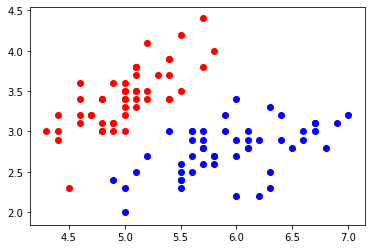

In [3]:
plt.scatter(X[y==0,0], X[y==0,1], color='red')
plt.scatter(X[y==1,0], X[y==1,1], color='blue')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X)
X_standard = standardScaler.transform(X)

In [5]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1e9)

svc.fit(X_standard, y)

LinearSVC(C=1000000000.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [6]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

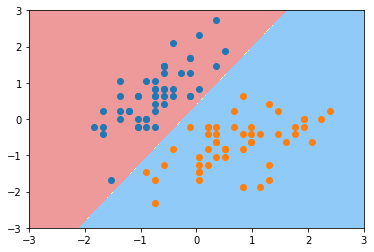

In [7]:
plot_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [8]:
svc2 = LinearSVC(C=0.01)

svc2.fit(X_standard, y)

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

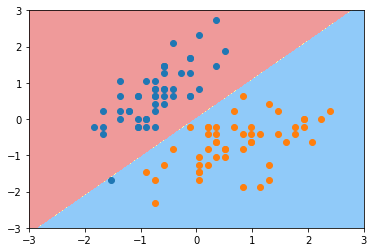

In [9]:
plot_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

In [10]:
svc.coef_

array([[ 4.03243305, -2.50699451]])

In [11]:
svc.intercept_

array([0.92733151])

In [12]:
def plot_svc_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    
    w = model.coef_[0]
    b = model.intercept_[0]
    
    # w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    plot_x = np.linspace(axis[0], axis[1], 200)
    up_y = -w[0]/w[1] * plot_x - b/w[1] + 1/w[1]
    down_y = -w[0]/w[1] * plot_x - b/w[1] - 1/w[1]
    
    up_index = (up_y >= axis[2]) & (up_y <= axis[3])
    down_index = (down_y >= axis[2]) & (down_y <= axis[3])
    plt.plot(plot_x[up_index], up_y[up_index], color='black')
    plt.plot(plot_x[down_index], down_y[down_index], color='black')

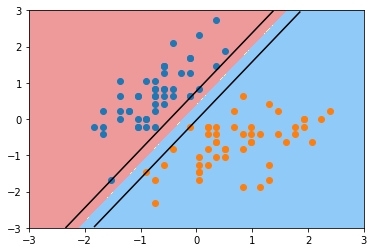

In [13]:
plot_svc_decision_boundary(svc, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

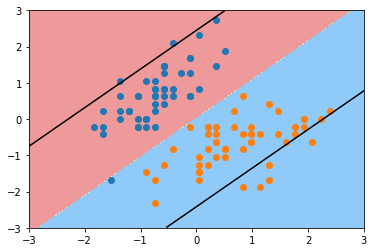

In [14]:
plot_svc_decision_boundary(svc2, axis=[-3, 3, -3, 3])
plt.scatter(X_standard[y==0,0], X_standard[y==0,1])
plt.scatter(X_standard[y==1,0], X_standard[y==1,1])
plt.show()

## 11.5 SVM中使用多项式特征和函数

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn import datasets

X, y = datasets.make_moons()

In [17]:
X.shape

(100, 2)

In [18]:
y.shape

(100,)

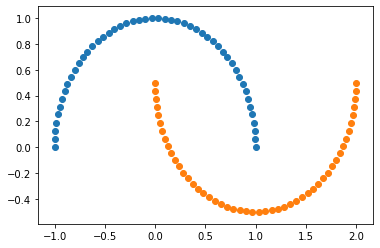

In [19]:
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

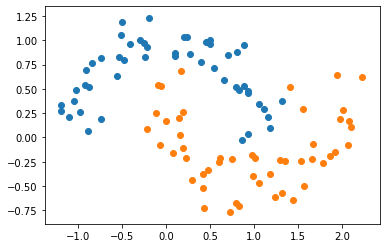

In [20]:
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### 使用多项式特征的SVM

In [21]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline


def PolynomialSVC(degree, C=1.0):
    return Pipeline({
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("linearSVC", LinearSVC(C=C))
    })

In [22]:
poly_svc = PolynomialSVC(degree=3)

In [23]:
poly_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVC',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='squared_hinge', max_iter=1000,
                           multi_class='ovr', penalty='l2', random_state=None,
                           tol=0.0001, verbose=0))],
         verbose=False)

In [24]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

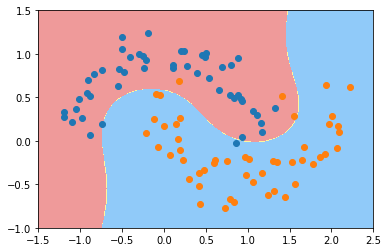

In [25]:
plot_decision_boundary(poly_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### 使用多项式核函数的SVM

In [26]:
from sklearn.svm import SVC

def PolynomialKernelSVC(degree, C=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("kernelSVC", SVC(kernel='poly', degree=degree, C=C))
    ])

In [27]:
poly_kernel_svc = PolynomialKernelSVC(degree=3)
poly_kernel_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kernelSVC',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='poly', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

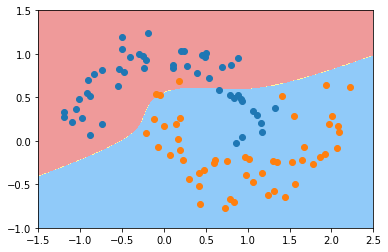

In [28]:
plot_decision_boundary(poly_kernel_svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 11.6 到底什么是核函数

### 11.6.1 概述
![](../image/svm6-1.png)
#### 核函数
K(x_i, x_j)是核函数
$$ max\sum_{i=1}{m}\alpha_i - \frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\alpha_i\alpha_jy_iy_jK(x_i, x_j)$$
$$st. \quad 0≤\alpha_i≤C$$
$$\sum_{(i=1}{m}\alpha_iy_i=0$$

### 11.6.2 多项式核函数

#### 多项式（n=2）核函数
$$K(x, y) = (x\cdot y + 1)^2$$


$$K(x, y) = (\sum_{i=1}^nx\cdot y + 1)^2 = \sum_{i=1}^n(x_i^2)(y_i^2) + \sum_{i=2}^n\sum_{j=1}^{i-1}(\sqrt{2}x_ix_j)(\sqrt{2}y_iy_j) + \sum_{i=1}^n(\sqrt{2}x_i)(\sqrt{2}y_i) + 1 = x\prime\cdot y\prime$$

$$ x=(x_n^2,...,x_1^2,\sqrt{2}x_nx_{n-1},...,\sqrt{2}x_n,...,\sqrt{2}x_1,1)$$

#### 多项式核函数
$$K(x, y) = (x\cdot y + c)^d$$

#### 线性核函数

$$K(x, y) = x\cdot y$$

## 11.7 RBF核函数
径向基核函数(Radial Basis Function Kernel)，又称高斯核函数
### 11.7.1 概述
#### 高斯核函数
* K(x,y)表示x和y的点乘
$$K(x,y) = e^{-\gamma||x-y||^2}$$

* 高斯函数（正态分布）
$$g(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$$

#### 将每一个样本点映射到一个无穷维的特征空间
* 依靠升维使得原本线性不可分的数据线性可分
##### 线性不可分
![](../image/svm7-1.png)
##### 升维后线性可分
![](../image/svm7-2.png)

$$ x --> (e^{-\gamma||x-l_1||^2},e^{-\gamma||x-l_2||^2}) $$

$$K(x,y) = e^{-\gamma||x-y||^2}$$

* 高斯核：对于每一个数据点都是landmark
* m*n的数据映射成了m*m的数据

### 11.7.2 直观理解高斯核函数

In [29]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
x = np.arange(-4, 5, 1)

In [31]:
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [32]:
y = np.array((x >=-2) & (x <=2), dtype='int')

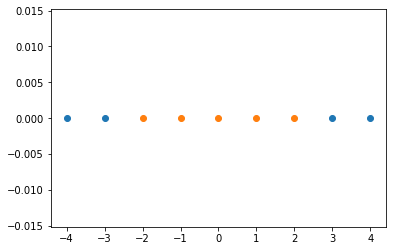

In [33]:
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))
plt.show()

In [34]:
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x-l)**2)

In [35]:
l1, l2 = -1, 1

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)

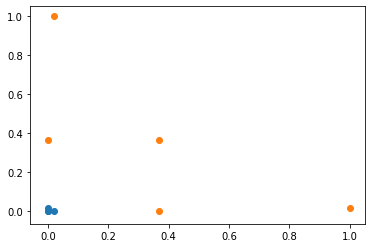

In [36]:
plt.scatter(X_new[y==0,0], X_new[y==0,1])
plt.scatter(X_new[y==1,0], X_new[y==1,1])
plt.show()

## 11.8 RBF核函数中的gamma
### 11.8.1 概述
* 核函数
$$K(x,y) = e^{-\gamma||x-y||^2}$$

* 高斯函数
$$g(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^2}$$
![](../image/svm8-1.png)

#### 规律
* gamma越大，高斯分布越窄
* gamma越小，高斯分布越宽

In [37]:
import numpy as np
import matplotlib.pyplot as plt

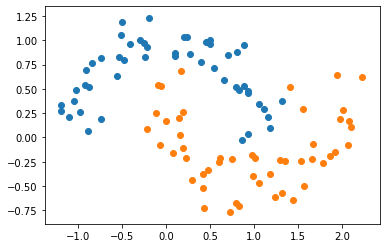

In [38]:
from sklearn import datasets

X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("svc", SVC(kernel="rbf", gamma=gamma))
    ])

In [40]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=1.0, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [41]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

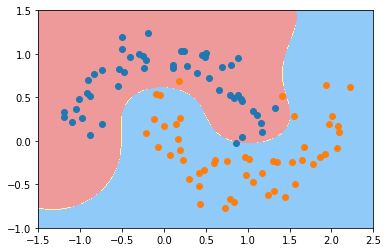

In [42]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [43]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=100, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

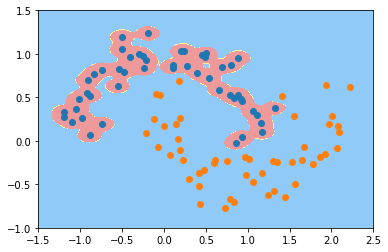

In [44]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [45]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=10, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

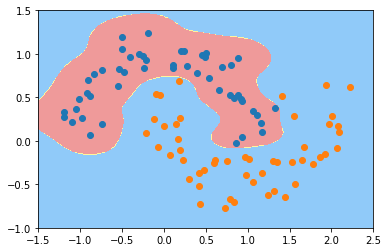

In [46]:
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [47]:
svc_gamma05 = RBFKernelSVC(gamma=0.5)
svc_gamma05.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.5, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

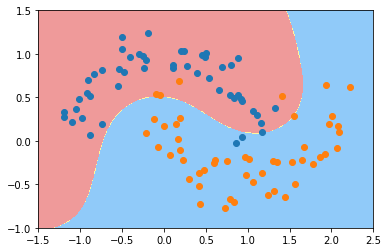

In [48]:
plot_decision_boundary(svc_gamma05, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

In [49]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

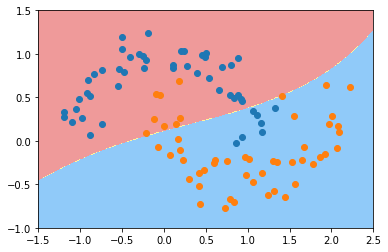

In [50]:
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

## 11.9 SVM思想解决回归问题

![](../image/svm9-1.png)

In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [54]:
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def StandardLinearSVR(epsilon=0.1):
    return Pipeline([
        ("std_scaler", StandardScaler()),
        ("linearSVR", LinearSVR(epsilon=epsilon)),
    ])

In [55]:
svr = StandardLinearSVR()

In [56]:
svr.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearSVR',
                 LinearSVR(C=1.0, dual=True, epsilon=0.1, fit_intercept=True,
                           intercept_scaling=1.0, loss='epsilon_insensitive',
                           max_iter=1000, random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

In [57]:
svr.score(X_test, y_test)

0.6358032153731563